In [15]:
#Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
#Load data

df_2019 = pd.read_csv('data/mini-lottowyniki 2019.csv', sep=';')
df_2020 = pd.read_csv('data/mini-lottowyniki 2020.csv', sep=';')
df_2021 = pd.read_csv('data/mini-lottowyniki 2021.csv', sep=';')
df_2022 = pd.read_csv('data/mini-lottowyniki 2022.csv', sep=';')

In [17]:
#Mini lotto numbers are from 1 to 42 
# quantity = np.array([np.arange(1,43,1, dtype=int), np.zeros(len(np.arange(1,43,1)))])
# quantity = np.transpose(quantity)

In [18]:
#----------------------2019--------------------------
#Calculating quantity of numbers per column

available_numbers = np.arange(1,43,1)
columns = ['N1', 'N2', 'N3', 'N4', 'N5']

df_all_quantity_2019 = pd.DataFrame(available_numbers, columns = ['numbers'])

for column in columns:
    quantity = np.array([np.arange(1,43,1, dtype=int), np.zeros(len(np.arange(1,43,1)))])
    quantity = np.transpose(quantity)
    for i in df_2019[column]:
        for number in available_numbers:
            if i == number:
                quantity[number-1][1] = quantity[number-1][1] + 1 
    df_quantity = pd.DataFrame(quantity, columns = ['numbers', column])  
    df_all_quantity_2019[column] = df_quantity[column]
    
print(df_all_quantity_2019.head(5))

   numbers    N1    N2   N3   N4   N5
0        1  39.0   0.0  0.0  0.0  0.0
1        2  36.0   2.0  0.0  0.0  0.0
2        3  32.0  10.0  1.0  0.0  0.0
3        4  46.0   6.0  0.0  0.0  0.0
4        5  38.0  19.0  4.0  0.0  0.0


In [19]:
#Adding column with sum for all numbers

df_all_quantity_2019['sum_all'] = df_all_quantity_2019['N1'] + df_all_quantity_2019['N2'] + df_all_quantity_2019['N3'] + df_all_quantity_2019['N4'] + df_all_quantity_2019['N5']

In [20]:
#Printing dataframe sorted by descending with sum_all

print(df_all_quantity_2019.sort_values(by=['sum_all'], ascending=False).head(10))

    numbers    N1    N2    N3    N4    N5  sum_all
4         5  38.0  19.0   4.0   0.0   0.0     61.0
27       28   0.0   5.0  22.0  17.0  13.0     57.0
21       22   4.0   8.0  31.0  10.0   3.0     56.0
36       37   0.0   0.0   4.0  21.0  30.0     55.0
3         4  46.0   6.0   0.0   0.0   0.0     52.0
31       32   0.0   0.0   9.0  24.0  19.0     52.0
34       35   0.0   0.0  10.0  18.0  24.0     52.0
15       16   7.0  23.0  17.0   4.0   0.0     51.0
22       23   5.0  13.0  16.0  10.0   5.0     49.0
28       29   0.0   1.0  12.0  28.0   8.0     49.0


In [21]:
#Visualisation

# plt.figure(figsize=(14, 6))
# sns.set_style("darkgrid")
# sns.set(font="Verdana")
# ax = sns.barplot(x='numbers', y="sum_all", data=df_all_quantity_2019)
# sns.color_palette()
# plt.ylabel("Quantity")
# plt.xlabel("Numbers")
# plt.title("Quantity of numbers in 2019")

In [22]:
#----------------------2020--------------------------

available_numbers = np.arange(1,43,1)
columns = ['N1', 'N2', 'N3', 'N4', 'N5']

df_all_quantity_2020 = pd.DataFrame(available_numbers, columns = ['numbers'])

for column in columns:
    quantity = np.array([np.arange(1,43,1, dtype=int), np.zeros(len(np.arange(1,43,1)))])
    quantity = np.transpose(quantity)
    for i in df_2020[column]:
        for number in available_numbers:
            if i == number:
                quantity[number-1][1] = quantity[number-1][1] + 1 
    df_quantity = pd.DataFrame(quantity, columns = ['numbers', column])  
    df_all_quantity_2020[column] = df_quantity[column]
    
df_all_quantity_2020['sum_all'] = df_all_quantity_2020['N1'] + df_all_quantity_2020['N2'] + df_all_quantity_2020['N3'] + df_all_quantity_2020['N4'] + df_all_quantity_2020['N5']

# plt.figure(figsize=(14, 6))
# sns.set_style("darkgrid")
# sns.set(font="Verdana")
# ax = sns.barplot(x='numbers', y="sum_all", data=df_all_quantity_2020)
# sns.color_palette()
# plt.ylabel("Quantity")
# plt.xlabel("Numbers")
# plt.title("Quantity of numbers in 2020")

In [23]:
#----------------------2021--------------------------

available_numbers = np.arange(1,43,1)
columns = ['N1', 'N2', 'N3', 'N4', 'N5']

df_all_quantity_2021 = pd.DataFrame(available_numbers, columns = ['numbers'])

for column in columns:
    quantity = np.array([np.arange(1,43,1, dtype=int), np.zeros(len(np.arange(1,43,1)))])
    quantity = np.transpose(quantity)
    for i in df_2021[column]:
        for number in available_numbers:
            if i == number:
                quantity[number-1][1] = quantity[number-1][1] + 1 
    df_quantity = pd.DataFrame(quantity, columns = ['numbers', column])  
    df_all_quantity_2021[column] = df_quantity[column]
    
df_all_quantity_2021['sum_all'] = df_all_quantity_2021['N1'] + df_all_quantity_2021['N2'] + df_all_quantity_2021['N3'] + df_all_quantity_2021['N4'] + df_all_quantity_2021['N5']

# plt.figure(figsize=(14, 6))
# sns.set_style("darkgrid")
# sns.set(font="Verdana")
# ax = sns.barplot(x='numbers', y="sum_all", data=df_all_quantity_2021)
# sns.color_palette()
# plt.ylabel("Quantity")
# plt.xlabel("Numbers")
# plt.title("Quantity of numbers in 2021")

In [24]:
#----------------------2022--------------------------

available_numbers = np.arange(1,43,1)
columns = ['N1', 'N2', 'N3', 'N4', 'N5']

df_all_quantity_2022 = pd.DataFrame(available_numbers, columns = ['numbers'])

for column in columns:
    quantity = np.array([np.arange(1,43,1, dtype=int), np.zeros(len(np.arange(1,43,1)))])
    quantity = np.transpose(quantity)
    for i in df_2022[column]:
        for number in available_numbers:
            if i == number:
                quantity[number-1][1] = quantity[number-1][1] + 1 
    df_quantity = pd.DataFrame(quantity, columns = ['numbers', column])  
    df_all_quantity_2022[column] = df_quantity[column]
    
df_all_quantity_2022['sum_all'] = df_all_quantity_2022['N1'] + df_all_quantity_2022['N2'] + df_all_quantity_2022['N3'] + df_all_quantity_2022['N4'] + df_all_quantity_2022['N5']

# plt.figure(figsize=(14, 6))
# sns.set_style("darkgrid")
# sns.set(font="Verdana")
# ax = sns.barplot(x='numbers', y="sum_all", data=df_all_quantity_2022)
# sns.color_palette()
# plt.ylabel("Quantity")
# plt.xlabel("Numbers")
# plt.title("Quantity of numbers in 2022")

Text(0.5, 1.0, 'Quantity of numbers in 2022')

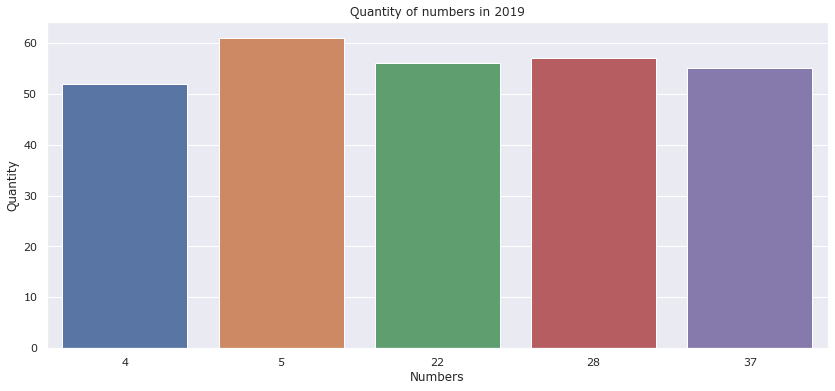

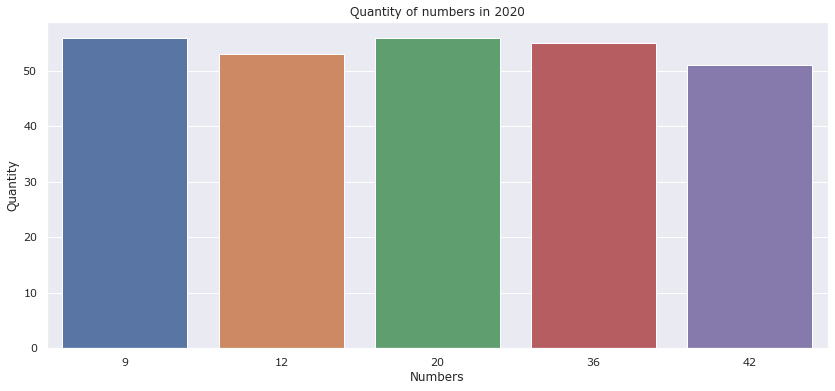

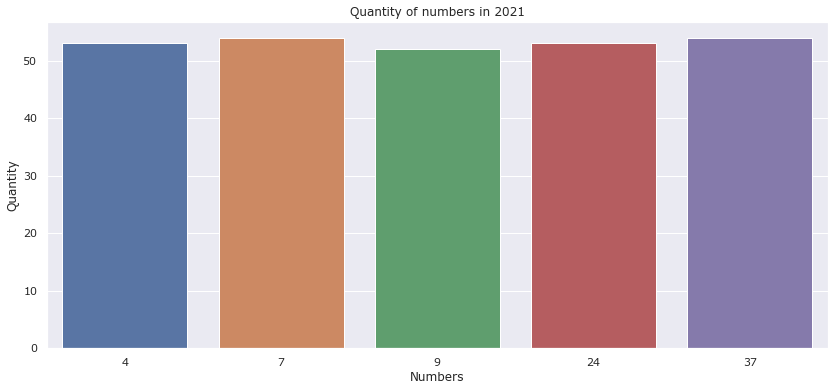

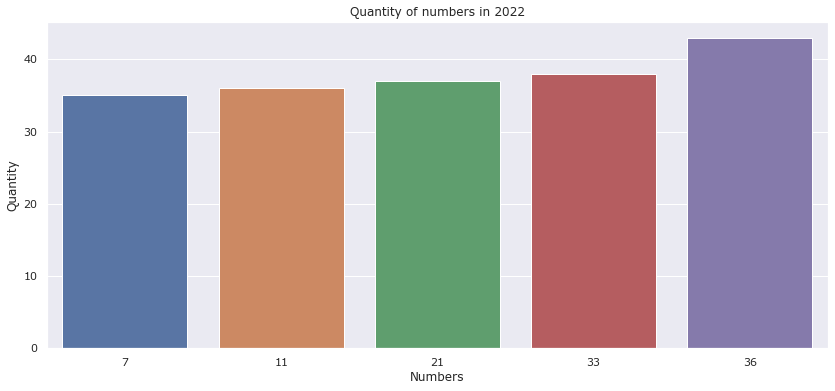

In [39]:
#----------------------Visualisation--------------------------
plt.figure(figsize=(14, 6))
sns.set_style("darkgrid")
sns.set(font="Verdana")
ax = sns.barplot(x='numbers', y="sum_all", data=df_all_quantity_2019.sort_values(by=['sum_all'], ascending=False).head(5))
sns.color_palette()
plt.ylabel("Quantity")
plt.xlabel("Numbers")
plt.title("Quantity of numbers in 2019")

plt.figure(figsize=(14, 6))
sns.set_style("darkgrid")
sns.set(font="Verdana")
ax = sns.barplot(x='numbers', y="sum_all", data=df_all_quantity_2020.sort_values(by=['sum_all'], ascending=False).head(5))
sns.color_palette()
plt.ylabel("Quantity")
plt.xlabel("Numbers")
plt.title("Quantity of numbers in 2020")

plt.figure(figsize=(14, 6))
sns.set_style("darkgrid")
sns.set(font="Verdana")
ax = sns.barplot(x='numbers', y="sum_all", data=df_all_quantity_2021.sort_values(by=['sum_all'], ascending=False).head(5))
sns.color_palette()
plt.ylabel("Quantity")
plt.xlabel("Numbers")
plt.title("Quantity of numbers in 2021")

plt.figure(figsize=(14, 6))
sns.set_style("darkgrid")
sns.set(font="Verdana")
ax = sns.barplot(x='numbers', y="sum_all", data=df_all_quantity_2022.sort_values(by=['sum_all'], ascending=False).head(5))
sns.color_palette()
plt.ylabel("Quantity")
plt.xlabel("Numbers")
plt.title("Quantity of numbers in 2022")

In [34]:
#Compare the results
print('-------------2019--------------')
print(df_all_quantity_2019.sort_values(by=['sum_all'], ascending=False).head(5))
print('-------------2020--------------')
print(df_all_quantity_2020.sort_values(by=['sum_all'], ascending=False).head(5))
print('-------------2021-------------')
print(df_all_quantity_2021.sort_values(by=['sum_all'], ascending=False).head(5))
print('-------------2022--------------')
print(df_all_quantity_2022.sort_values(by=['sum_all'], ascending=False).head(5))

-------------2019--------------
    numbers    N1    N2    N3    N4    N5  sum_all
4         5  38.0  19.0   4.0   0.0   0.0     61.0
27       28   0.0   5.0  22.0  17.0  13.0     57.0
21       22   4.0   8.0  31.0  10.0   3.0     56.0
36       37   0.0   0.0   4.0  21.0  30.0     55.0
3         4  46.0   6.0   0.0   0.0   0.0     52.0
-------------2020--------------
    numbers    N1    N2    N3    N4    N5  sum_all
8         9  14.0  27.0  13.0   2.0   0.0     56.0
19       20   3.0  17.0  18.0  15.0   3.0     56.0
35       36   0.0   1.0   1.0  28.0  25.0     55.0
11       12  13.0  22.0  16.0   2.0   0.0     53.0
41       42   0.0   0.0   0.0   0.0  51.0     51.0
-------------2021-------------
    numbers    N1    N2    N3    N4    N5  sum_all
36       37   0.0   1.0   3.0  16.0  34.0     54.0
6         7  35.0  12.0   7.0   0.0   0.0     54.0
3         4  40.0  12.0   1.0   0.0   0.0     53.0
23       24   1.0  11.0  17.0  19.0   5.0     53.0
8         9  29.0  17.0   3.0   3.0   

    numbers     N1    N2    N3    N4     N5  sum_all
35       36    0.0   1.0  16.0  83.0   88.0    188.0
21       22    4.0  36.0  85.0  43.0   12.0    180.0
11       12   47.0  84.0  42.0   5.0    0.0    178.0
3         4  135.0  40.0   3.0   0.0    0.0    178.0
36       37    0.0   1.0   8.0  59.0  108.0    176.0
32       33    1.0   8.0  34.0  61.0   66.0    170.0
13       14   29.0  71.0  53.0  14.0    0.0    167.0
41       42    0.0   0.0   0.0   0.0  167.0    167.0
6         7  106.0  49.0  12.0   0.0    0.0    167.0
34       35    0.0   1.0  23.0  67.0   75.0    166.0


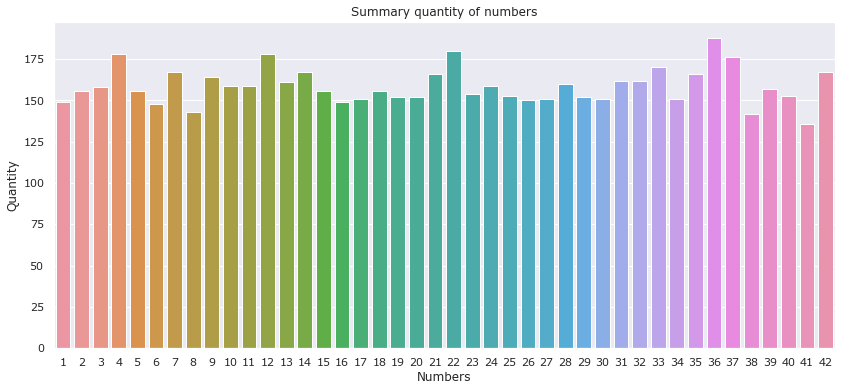

In [57]:
#Four years summary

summary_quantity = pd.DataFrame(available_numbers, columns = ['numbers'])
summary_quantity['N1'] = df_all_quantity_2019['N1'] + df_all_quantity_2020['N1'] + df_all_quantity_2021['N1'] + df_all_quantity_2022['N1']
summary_quantity['N2'] = df_all_quantity_2019['N2'] + df_all_quantity_2020['N2'] + df_all_quantity_2021['N2'] + df_all_quantity_2022['N2']
summary_quantity['N3'] = df_all_quantity_2019['N3'] + df_all_quantity_2020['N3'] + df_all_quantity_2021['N3'] + df_all_quantity_2022['N3']
summary_quantity['N4'] = df_all_quantity_2019['N4'] + df_all_quantity_2020['N4'] + df_all_quantity_2021['N4'] + df_all_quantity_2022['N4']
summary_quantity['N5'] = df_all_quantity_2019['N5'] + df_all_quantity_2020['N5'] + df_all_quantity_2021['N5'] + df_all_quantity_2022['N5']

summary_quantity['sum_all'] = summary_quantity['N1'] + summary_quantity['N2'] + summary_quantity['N3'] + summary_quantity['N4'] + summary_quantity['N5']

plt.figure(figsize=(14, 6))
sns.set_style("darkgrid")
sns.set(font="Verdana")
ax = sns.barplot(x='numbers', y="sum_all", data=summary_quantity.sort_values(by=['sum_all'], ascending=False))
sns.color_palette()
plt.ylabel("Quantity")
plt.xlabel("Numbers")
plt.title("Summary quantity of numbers")

print(summary_quantity.sort_values(by=['sum_all'], ascending=False).head(10))